<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.

Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

### Importing Certain important libraries

In [ ]:
import io

from google.colab import files

upload = files.upload()

### Uploading our dataset to GoogleDrive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [ ]:
data = pd.read_json("amsterdam.json")
data.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


### Getting the info


1.   Shape
2.   Columns
3.   Data Types
4.   Description



In [ ]:
print("Shape: ", data.shape)
print("\nColumns: ", data.columns)
print("\nTypes: \n",data.dtypes)

print("\n",data.describe())

Shape:  (15181, 13)

Columns:  Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'room_type', 'instant_bookable'],
      dtype='object')

Types: 
 host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

        host_listings_count  accommodates  ...      latitude     longitude
count         15178.000000  15181.000000  ...  15

### Dealing with Missing Values

In [ ]:
# Seeing Missing values in data

# Total no. of values that are lost in the features
total = data.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                Total   Percent
bathrooms                          18  0.001186
bedrooms                           12  0.000790
host_listings_count                 3  0.000198
instant_bookable                    0  0.000000
room_type                           0  0.000000
longitude                           0  0.000000
latitude                            0  0.000000
price                               0  0.000000
calculated_host_listings_count      0  0.000000
number_of_reviews                   0  0.000000
minimum_nights                      0  0.000000
guests_included                     0  0.000000
accommodates                        0  0.000000


In [ ]:
data['bathrooms'] = data['bathrooms'].fillna(data.bathrooms.mean())
data['bedrooms'] = data['bedrooms'].fillna(data.bedrooms.mean())
data['host_listings_count'] = data['host_listings_count'].fillna(data.host_listings_count.mean())

### Converting data types


As we can see that our target value and certain other features are of object type. So, we convert them into the float type so that we could work on them and find the corelation between the features.

In [ ]:
l = []
for i in data.price:
  i = i.replace(",", "")
  i = i.replace("$", "")
  l.append(i)

data.price = l
data.price = pd.to_numeric(data.price)

In [ ]:
c = data.room_type.unique()
for i in range(len(c)):
  data.room_type = data.room_type.replace(c[i], i+1)
data.room_type.unique()

array([1, 2, 3])

In [ ]:
c = data.instant_bookable.unique()
for i in range(len(c)):
  data.instant_bookable = data.instant_bookable.replace(c[i], i+1)
data.instant_bookable.unique()

array([1, 2])

In [ ]:
data.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,1,1
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,1,1
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,1,1
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,1,1
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,1,1


### Visualizing our dataset in the form of Corelation HeatMap

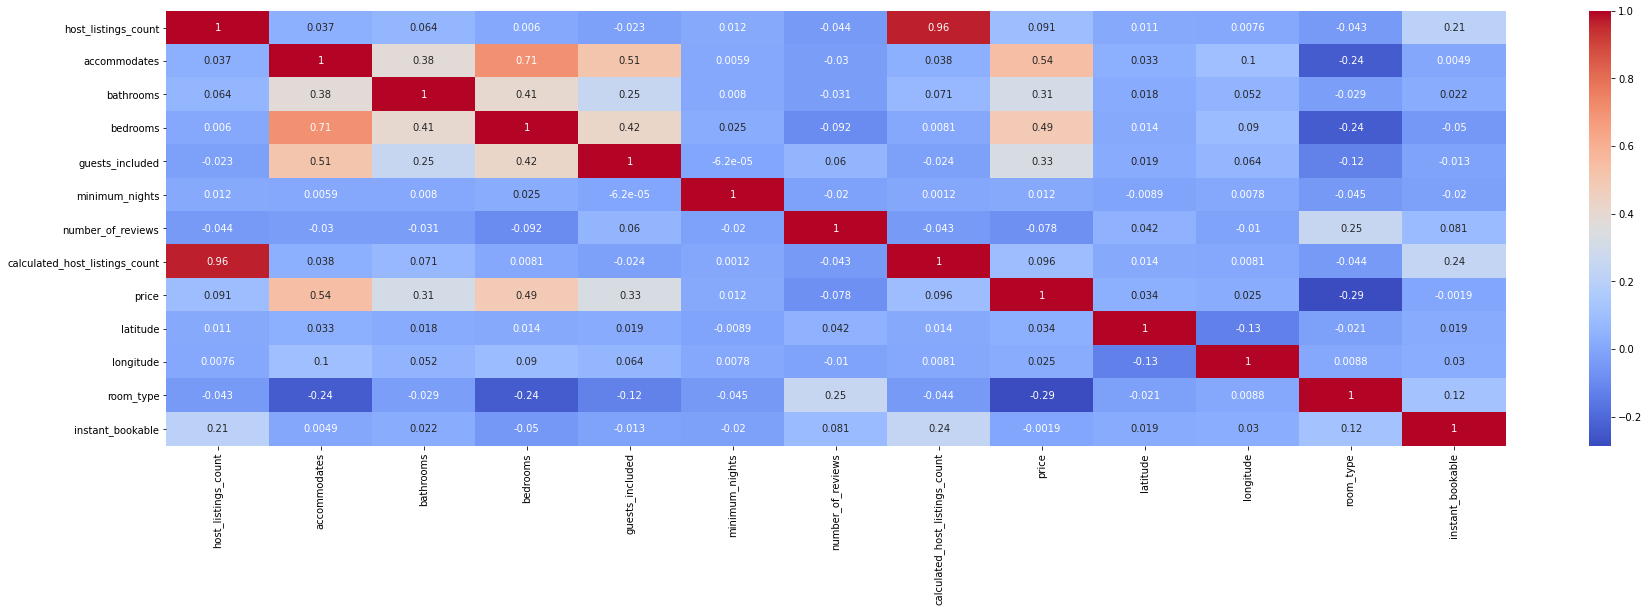

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
data.corr()["price"].sort_values(ascending=False) 

price                             1.000000
accommodates                      0.544902
bedrooms                          0.492566
guests_included                   0.328058
bathrooms                         0.308370
calculated_host_listings_count    0.095842
host_listings_count               0.091313
latitude                          0.034090
longitude                         0.024619
minimum_nights                    0.011706
instant_bookable                 -0.001926
number_of_reviews                -0.077721
room_type                        -0.285875
Name: price, dtype: float64

## Split the data into Trainset and Testset

In [ ]:
X = data.drop(['price'], axis=1)
Y = data['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

### Importing Random Forest Regression library

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#### Tuning the n_estimators

In [ ]:
for i in range(10, 200, 10):
    reg=RandomForestRegressor(n_estimators = i, max_depth = 5, max_features = 'sqrt', oob_score = True, random_state = 0)
    reg.fit(X_train,Y_train)
    oob=reg.oob_score_
    print('For n_estimators = '+str(i))
    print('OOB score is '+str(oob))
    print('************************')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


For n_estimators = 10
OOB score is 0.31424690564492486
************************
For n_estimators = 20
OOB score is 0.3454429660519045
************************
For n_estimators = 30
OOB score is 0.36056365957490455
************************
For n_estimators = 40
OOB score is 0.36461346821621377
************************
For n_estimators = 50
OOB score is 0.3670804050368395
************************
For n_estimators = 60
OOB score is 0.3663648211170576
************************
For n_estimators = 70
OOB score is 0.36636440611562426
************************
For n_estimators = 80
OOB score is 0.36635580867274564
************************
For n_estimators = 90
OOB score is 0.36775438540739347
************************
For n_estimators = 100
OOB score is 0.3689799280671109
************************
For n_estimators = 110
OOB score is 0.3693916799754411
************************
For n_estimators = 120
OOB score is 0.36987198707920654
************************
For n_estimators = 130
OOB score is 0.3688

In [ ]:
#Run a Random Forest regressor for n = 120 which gives us the maximum OOB score
reg = RandomForestRegressor(n_estimators = 120, max_depth = 5, max_features = 'sqrt', oob_score = True)
reg.fit(X_train,Y_train)

# Predicting the values
prediction = reg.predict(X_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

### Evaluation of the prediction
1.   R2_Score 
2.   Root Mean Squared Error



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print("R2_Score: ",r2_score(Y_test, prediction))
print("Root mean square error: ", sqrt(mean_squared_error(Y_test, prediction)))

R2_Score:  0.4319261070295013
Root mean square error:  58.86786862809194


In [ ]:
# Find Errors by calculating the difference between the actual and rpedicted values

Errors = Y_test - prediction

### Visualizing the Actual Value and Error in it with the Prediction Value

<BarContainer object of 3037 artists>

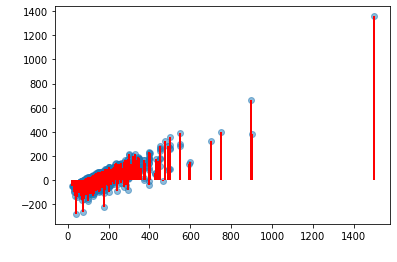

In [ ]:
#Scatter plot between the Actual values and Error term
plt.scatter(Y_test, Errors, alpha=0.5)
plt.xlabel("Actual Values", c = 'w')
plt.ylabel("Error in Actual values", c = 'w')

# Plotting the bar graph for the same
plt.bar(Y_test, Errors, width = 10.0, color = 'r') 